# Linear Systems

[return to main page](index.ipynb)

## Preparations

In [1]:
import tools
import sounddevice as sd  # for playback
import soundfile as sf  # for reading a soundfile

And some other stuff:

In [2]:
# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

## One-dimensional time-continuous Systems

First, we will have a quick review on linear systems in one dimension. In our case, we will use time signals depending on $t \in \mathbb{R}$. Generally, the input signal $x(t) \in \mathbb{C}$ and the corresponding output signal $y(t) \in \mathbb{C}$ of a system $\mathcal H$ are related via:

$$y(t) = \mathcal{H}\{x(t)\}\,.$$

### Linear Time-Invariant (LTI) Systems

As simple as it sounds, LTI-system are linear and time-invariant

#### Linearity

*Exercise*: Explain the term "linear" in your own words.

  

*Exercise*: What does this mean mathematically?

$$\mathcal{H}\{A \cdot x_1(t) + B \cdot x_2(t)\} = \,???\, \text{ for all } A,B \in \mathbb{C}$$



#### Time-Invariance

*Exercise*: Explain the term "time-invariance" in your own words.

*Exercise*: What does this mean mathematically?

$$\mathcal{H}\{x(t-\tau)\} = \,???\, \text{ for all } \tau \in \mathbb{R}$$

#### Are these systems LTI?

*Exercise*: Vote for your LTI-system.

1. $\displaystyle y(t) = a \cdot x(t) $ with $a \in \mathbb{C}$  
    Yes:  
    No:  
    Result: Yes
2. $\displaystyle y(t) = a \cdot x(t) + b $ with $a,b \in \mathbb{C}$  
    Yes:  
    No:  
    Result: No: time-invariant but non-linear
3. $\displaystyle y(t) = a \cdot x(t-t_0) $ with $a \in \mathbb{C}$ and $t_0 \in \mathbb{R}$  
    Yes:  
    No:  
    Result: Yes
4. $\displaystyle y(t) = a \cdot x(t-b \cdot t) $ with $a \in \mathbb{C}$ and $b \in \mathbb{R}$   
    Yes:  
    No:  
    Result: No: linear, but time-variant
5. $\displaystyle y(t) = \frac{\mathrm d x(t)}{\mathrm d t}$  
    Yes:  
    No:  
    Result: Yes
6. $\displaystyle y(t) = \int x(t)\,\mathrm d t $  
    Yes:  
    No:   
    Result: Yes 
7. $\displaystyle y(t) = \int_{-\infty}^{\infty} h(t_0) \cdot x(t - t_0)\,\mathrm d t_0 $  
    Yes:  
    No:  
    Result: Yes
    
#### Listen to a linear and a non-linear system

We will investigate two unknown systems. The only information we have about these systems is that the first is LTI (linear and time invariant) and the second is non-linear. They are defined by the functions `tools.blackbox()` and `tools.blackbox_nonlinear`. Have a quick look at the documentation:

In [3]:
tools.blackbox?
tools.blackbox_nonlinear?

*Exercise:* Load the audio file [data/xmas.wav](data/xmas.wav) and apply both functions to it.

In [4]:
# how to read an audio file
sf.read?

In [5]:
[x, fs] = sf.read('data/xmas.wav')

ylin = tools.blackbox(x, fs)
ynonlin = tools.blackbox_nonlinear(x, fs)

*Exercise*: Listen to the input signal and both output signals.

In [6]:
# how to play back the signal
sd.play?

In [7]:
sd.play(x, blocking=True)
sd.play(ylin, blocking=True)
sd.play(ynonlin, blocking=True)

### The Impulse Response

The impulse response $h(t)$ of an LTI system characterises it completely. It is system's response on a dirac impulse $\delta(t)$

$$h(t) = \mathcal{H}\{\delta(t)\}\,.$$

So why is the impulse response sufficient to decribe the whole LTI system? The input signal $x(t)$ can be described as a sequences of dirac impulses 

$$ x(t) = \int_{-\infty}^{\infty} x(t_0) \cdot \delta(t-t_0)\,\mathrm d t_0\,,$$ 

where the dirac impulse at $t_0$ is weighted by the value $x(t_0)$ of the signal at $t_0$. Applying the system onto $x(t)$ yields

$$ y(t) = \mathcal{H}\{x(t)\} = \mathcal{H}\left\{\int_{-\infty}^{\infty} x(t_0) \cdot \delta(t-t_0)\,\mathrm d t_0\right\}$$

As a next step, we can exchange the integral operator $\int$ and the system operator $\mathcal{H}$:

$$ y(t) = \mathcal{H}\{x(t)\} = \int_{-\infty}^{\infty} x(t_0) \cdot \mathcal{H}\{\delta(t-t_0)\}\,\mathrm d t_0$$

*Exercise*: What property has to be fulfilled by $\mathcal{H}$ in order to be able to exchange integral and system operator?

<font color='blue'>
*
Linearity  
*
</font>

As the last step, we re-write the system response of the dirac $\delta$ shifted about $t_0$ as the shifted impulse response $h(t-t_0)$:

$$ y(t) = \mathcal{H}\{x(t)\} = \int_{-\infty}^{\infty} x(t_0) \cdot h(t-t_0)\,\mathrm d t_0$$

*Exercise*: What property has to be fulfilled by $\mathcal{H}$ in order to replace $\mathcal{H}\{\delta(t-t_0)\}$ by $h(t-t_0)$?

<font color='blue'>
*
Time-Invariance
*
</font>

Hence, we can describe the outsig signal $y(t)$ as the so-called **linear convolution** integral of the corresponding input signal $x(t)$ and the impulse response $h(t)$. Its short version reads

$$ y(t) = x(t) * h(t) $$

### A naive implementation of the linear Convolution

Time-continuous signals can not be easily handled by todays' computers. They are sampled in time with the sample period $T_s$. The discrete counterpart of a linear convolution is given as

$$ y[n] = x[n] \ast h[n] = \sum_{k = -\infty}^{\infty} x[k] \cdot h[n-k] $$

where $y[n] = y(n T_s)$, $x[n] = x(n T_s)$, and $h[n] = h(n T_s)$ denote the diskrete versions of the involved entities.

*Exercise:* Write a function called `naive_convolution()` that computes the convolution of two one-dimensional arrays by means of two nested loops according to the equation above, where $x$ and $h$ are one-dimensional arrays of finite lengths. The infinite sum can be changed to a finite sum by assuming that all values before index 0 and all values after the last array element are equal to zero.

Following this assumption, at which indices $n$ does $y[n]$ have its first and last non-zero value?

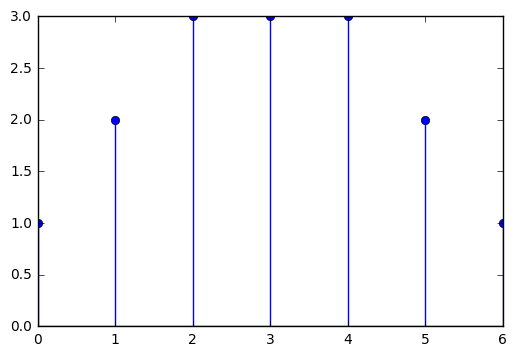

In [8]:
def naive_convolution(x, h):
    # in python, you have to indent everything inside your function
    
    Nx = len(x)  # lenght of x
    Nh = len(h)  # length of h
    Ny = Nx + Nh - 1  # resulting length of y

    y = np.zeros(Ny)  # initialise output array
    for k in np.arange(0,Nx):  # help: for which indices k is x non-zero?
        for n in np.arange(k,Nh+k):  # help: for which indices (n-k) is h non-zero?
            y[n] = y[n] + x[k] * h[n-k]
    
    return y
    # end of function

# try out your function
x = np.array([1,1,1,1,1])
h = np.array([1,1,1])

y = naive_convolution(x,h)
plt.stem(y);

### The Transfer Function



The transfer function of a LTI-system is the temporal Fourier transform its impulse response

$$ H(\omega) = \int_{-\infty}^{\infty} h(t) e^{-j\omega t} \mathrm d t$$

*Exercise*: $y(t)$, $x(t)$ and $h(t)$ are related over the convolution. How are the respective Fourier spectra $Y(\omega)$, $X(\omega)$, $H(\omega)$ related?

### A naive implementation of the Fourier Transform



Time-continuous signals can not be easily handled by todays' computers. They are sampled in time with the sample period $T_s$. In order to compute the Fourier transform of a signal, one has to discretize the integral

$$ H(\omega) = \sum_{n=-\infty}^{\infty} h[n] e^{-j\omega n T_s} $$

where $h[n] = h(n T_s)$ denotes the discrete versions of the involved $h(t)$.

*Exercise:* Write a function called `naive_ft()` that computes the Fourier transform of a given signal $x$ of finite length for different frequencies. Use two nested loops according for this, again. The infinite sum can be changed to a finite sum by assuming that all values before index 0 and all values after the last array element are equal to zero.

In [9]:
def naive_ft(x, f, fs):
    # inputs:
    # x - signal vector
    # f - time-frequencies
    # fs - sample rate
    
    # outputs:
    # X - frequency spectrum
    
    Nsig = len(x)  # length of signal
    Nspec = len(f)  # length of spectrum
    
    omega = 2*np.pi*f  # angular frequency
    
    X = np.zeros(Nspec, dtype=complex)  # initialise output spectrum
    for k in np.arange(0,Nspec):  # angular frequency
        for n in np.arange(0,Nsig):  # help: for which indices (n-k) is h non-zero?
            X[k] = X[k] + x[n]*np.exp(-1j*omega[k]*n/fs)
    
    return X
    # end of function


*Exercise:* Compute the transfer function of the blackbox system `tools.blackbox`.

(-60, 5)

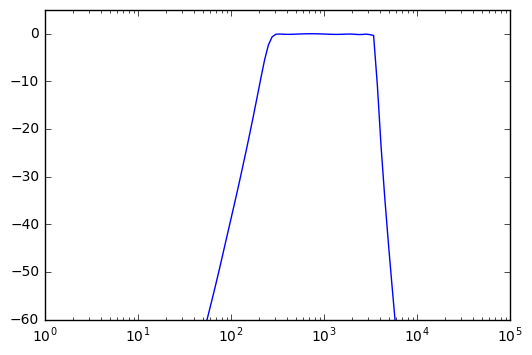

In [10]:
fs = 44100;  # sample rate
# frequency axis
f = np.logspace(-4, 0, 100)*fs/2;
# dirac as input signal
x = np.zeros(1024)
x[0] = 1;

h = tools.blackbox(x, fs);  # impulse response of black system
H = naive_ft(h, f, fs);  # transfer function of blackboard system

plt.semilogx(f, 20*np.log10(abs(H)));
plt.ylim([-60, 5])

## Solutions

If you had problems solving some of the exercises, don't despair!
Have a look at the [example solutions](linear_systems-solutions.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>